<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Horse_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>1. Data Exploration

In [4]:
!pip install scikit-plot

In [5]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [6]:
#Importing the dataset

df = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/horse.csv')
df.drop(['hospital_number'],axis=1, inplace=True)

target = 'outcome'
labels = ['died', 'euthanized', 'lived']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head(8))

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,depressed,hypomotile,slight,slight,none,NaN,decreased,firm,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
6,yes,adult,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,none,none,NaN,decreased,distend_large,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
7,yes,adult,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,NaN,absent,slight,slight,none,NaN,decreased,distend_small,44.0,8.3,NaN,NaN,died,yes,2208,0,0,no



Inference: The Datset consists of 27 features & 299 samples.


In [7]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   rectal_temp            239 non-null    float64
 3   pulse                  275 non-null    float64
 4   respiratory_rate       241 non-null    float64
 5   temp_of_extremities    243 non-null    object 
 6   peripheral_pulse       230 non-null    object 
 7   mucous_membrane        252 non-null    object 
 8   capillary_refill_time  267 non-null    object 
 9   pain                   244 non-null    object 
 10  peristalsis            255 non-null    object 
 11  abdominal_distention   243 non-null    object 
 12  nasogastric_tube       195 non-null    object 
 13  nasogastric_reflux     193 non-null    object 
 14  nasogastric_reflux_ph  53 non-null     float64
 15  rectal

In [8]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

surgery                   2
surgical_lesion           2
lesion_3                  2
cp_data                   2
age                       2
nasogastric_reflux        3
outcome                   3
abdomo_appearance         3
capillary_refill_time     3
nasogastric_tube          3
abdominal_distention      4
rectal_exam_feces         4
peripheral_pulse          4
temp_of_extremities       4
peristalsis               4
pain                      5
abdomen                   5
mucous_membrane           6
lesion_2                  6
nasogastric_reflux_ph    20
abdomo_protein           37
rectal_temp              40
respiratory_rate         40
packed_cell_volume       50
pulse                    52
lesion_1                 61
total_protein            80
dtype: int64

In [9]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 8 numerical & 18 categorical features.


In [10]:
#Checking the stats of all the columns

display(df.describe())

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

# <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


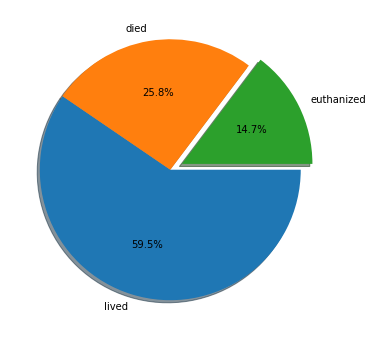

In [11]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(sorted(df[target].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

**Inference:** The Target Variable seems to be slightly imbalanced! Hence we shall try to perform data augmentation.

                               Visualising Categorical Features:                                


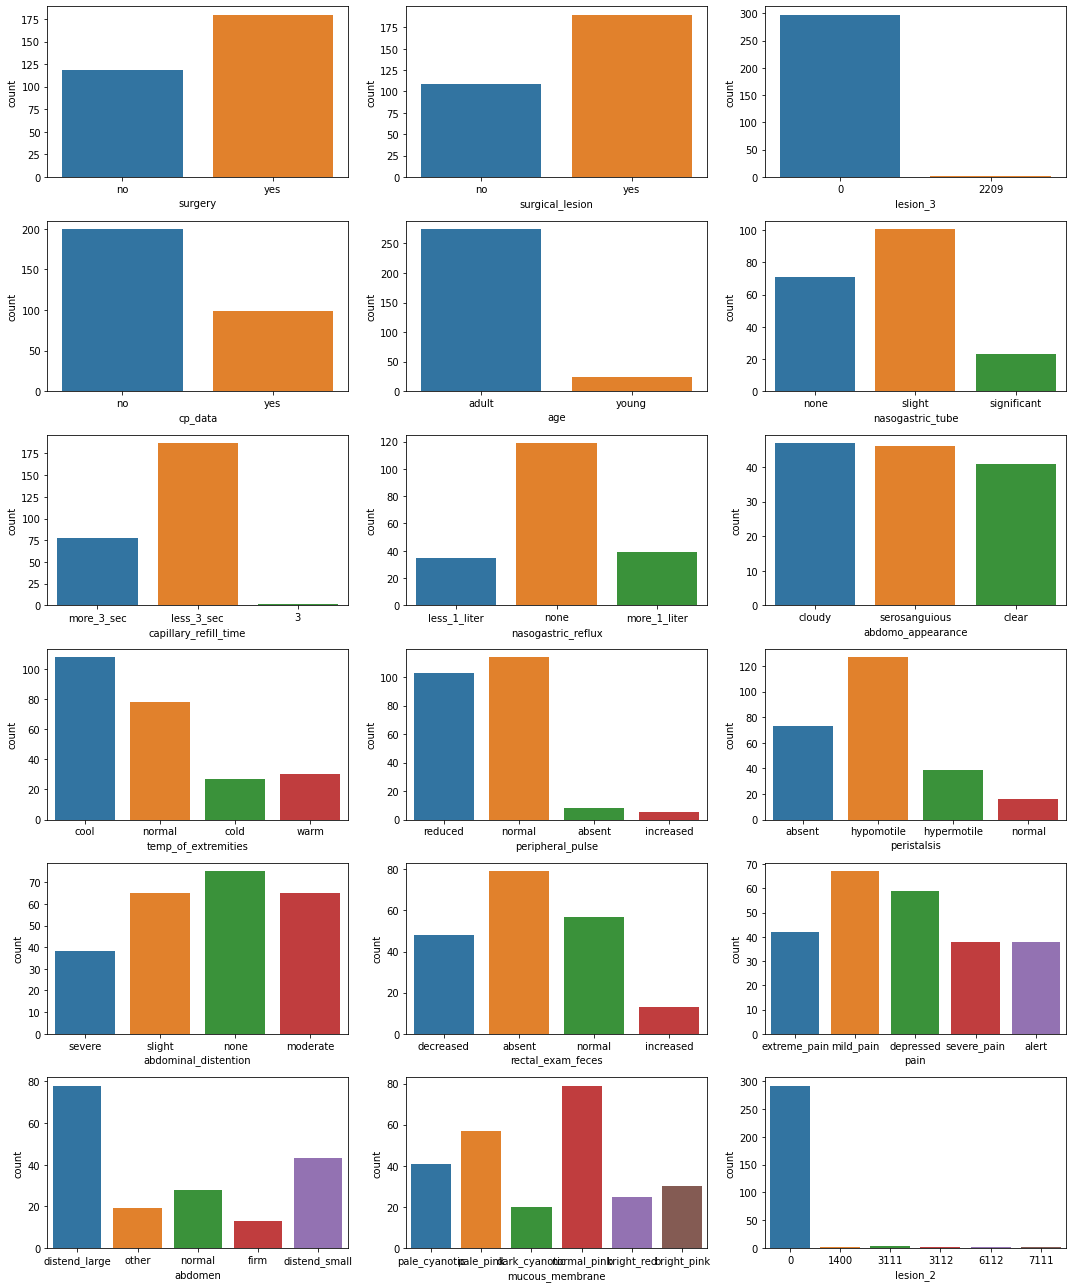

In [12]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=6:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

                                     Features Distribution                                      


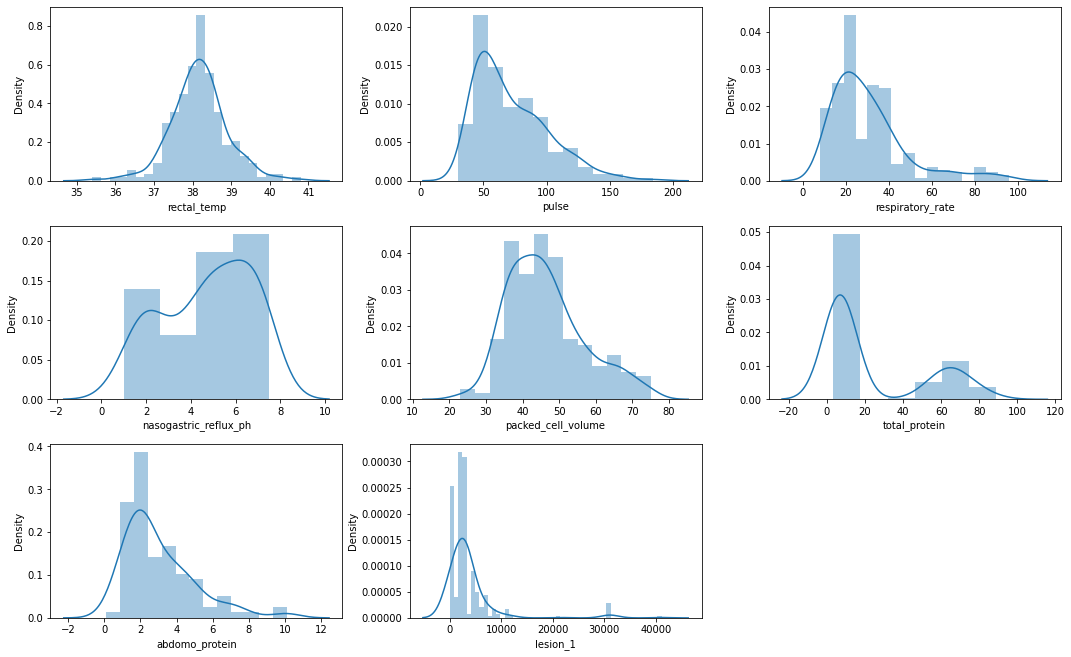

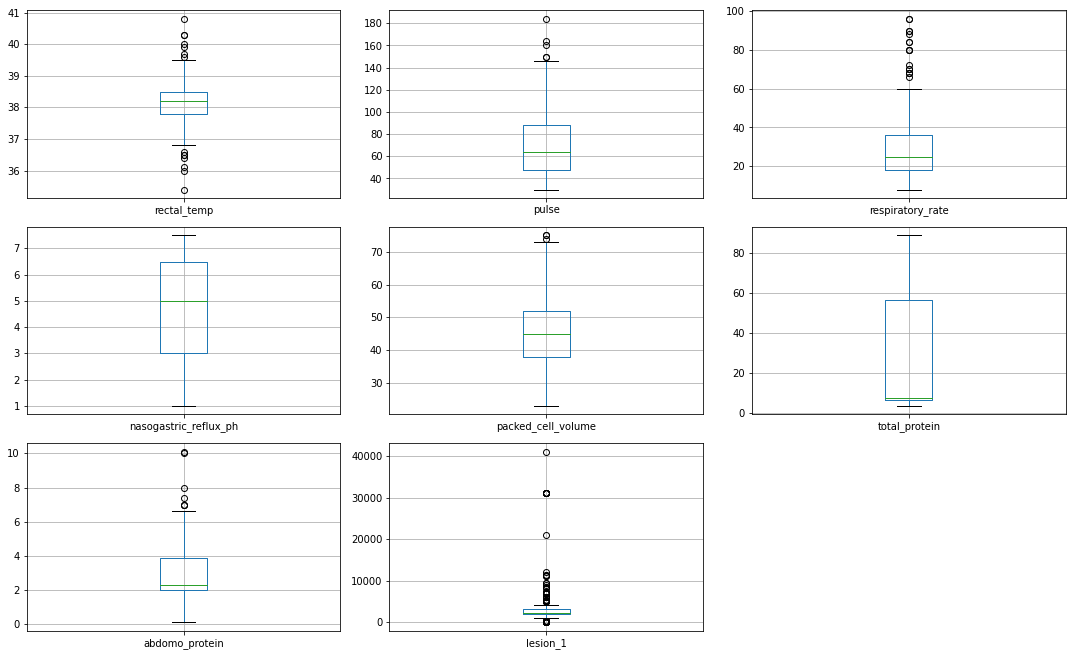

In [13]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

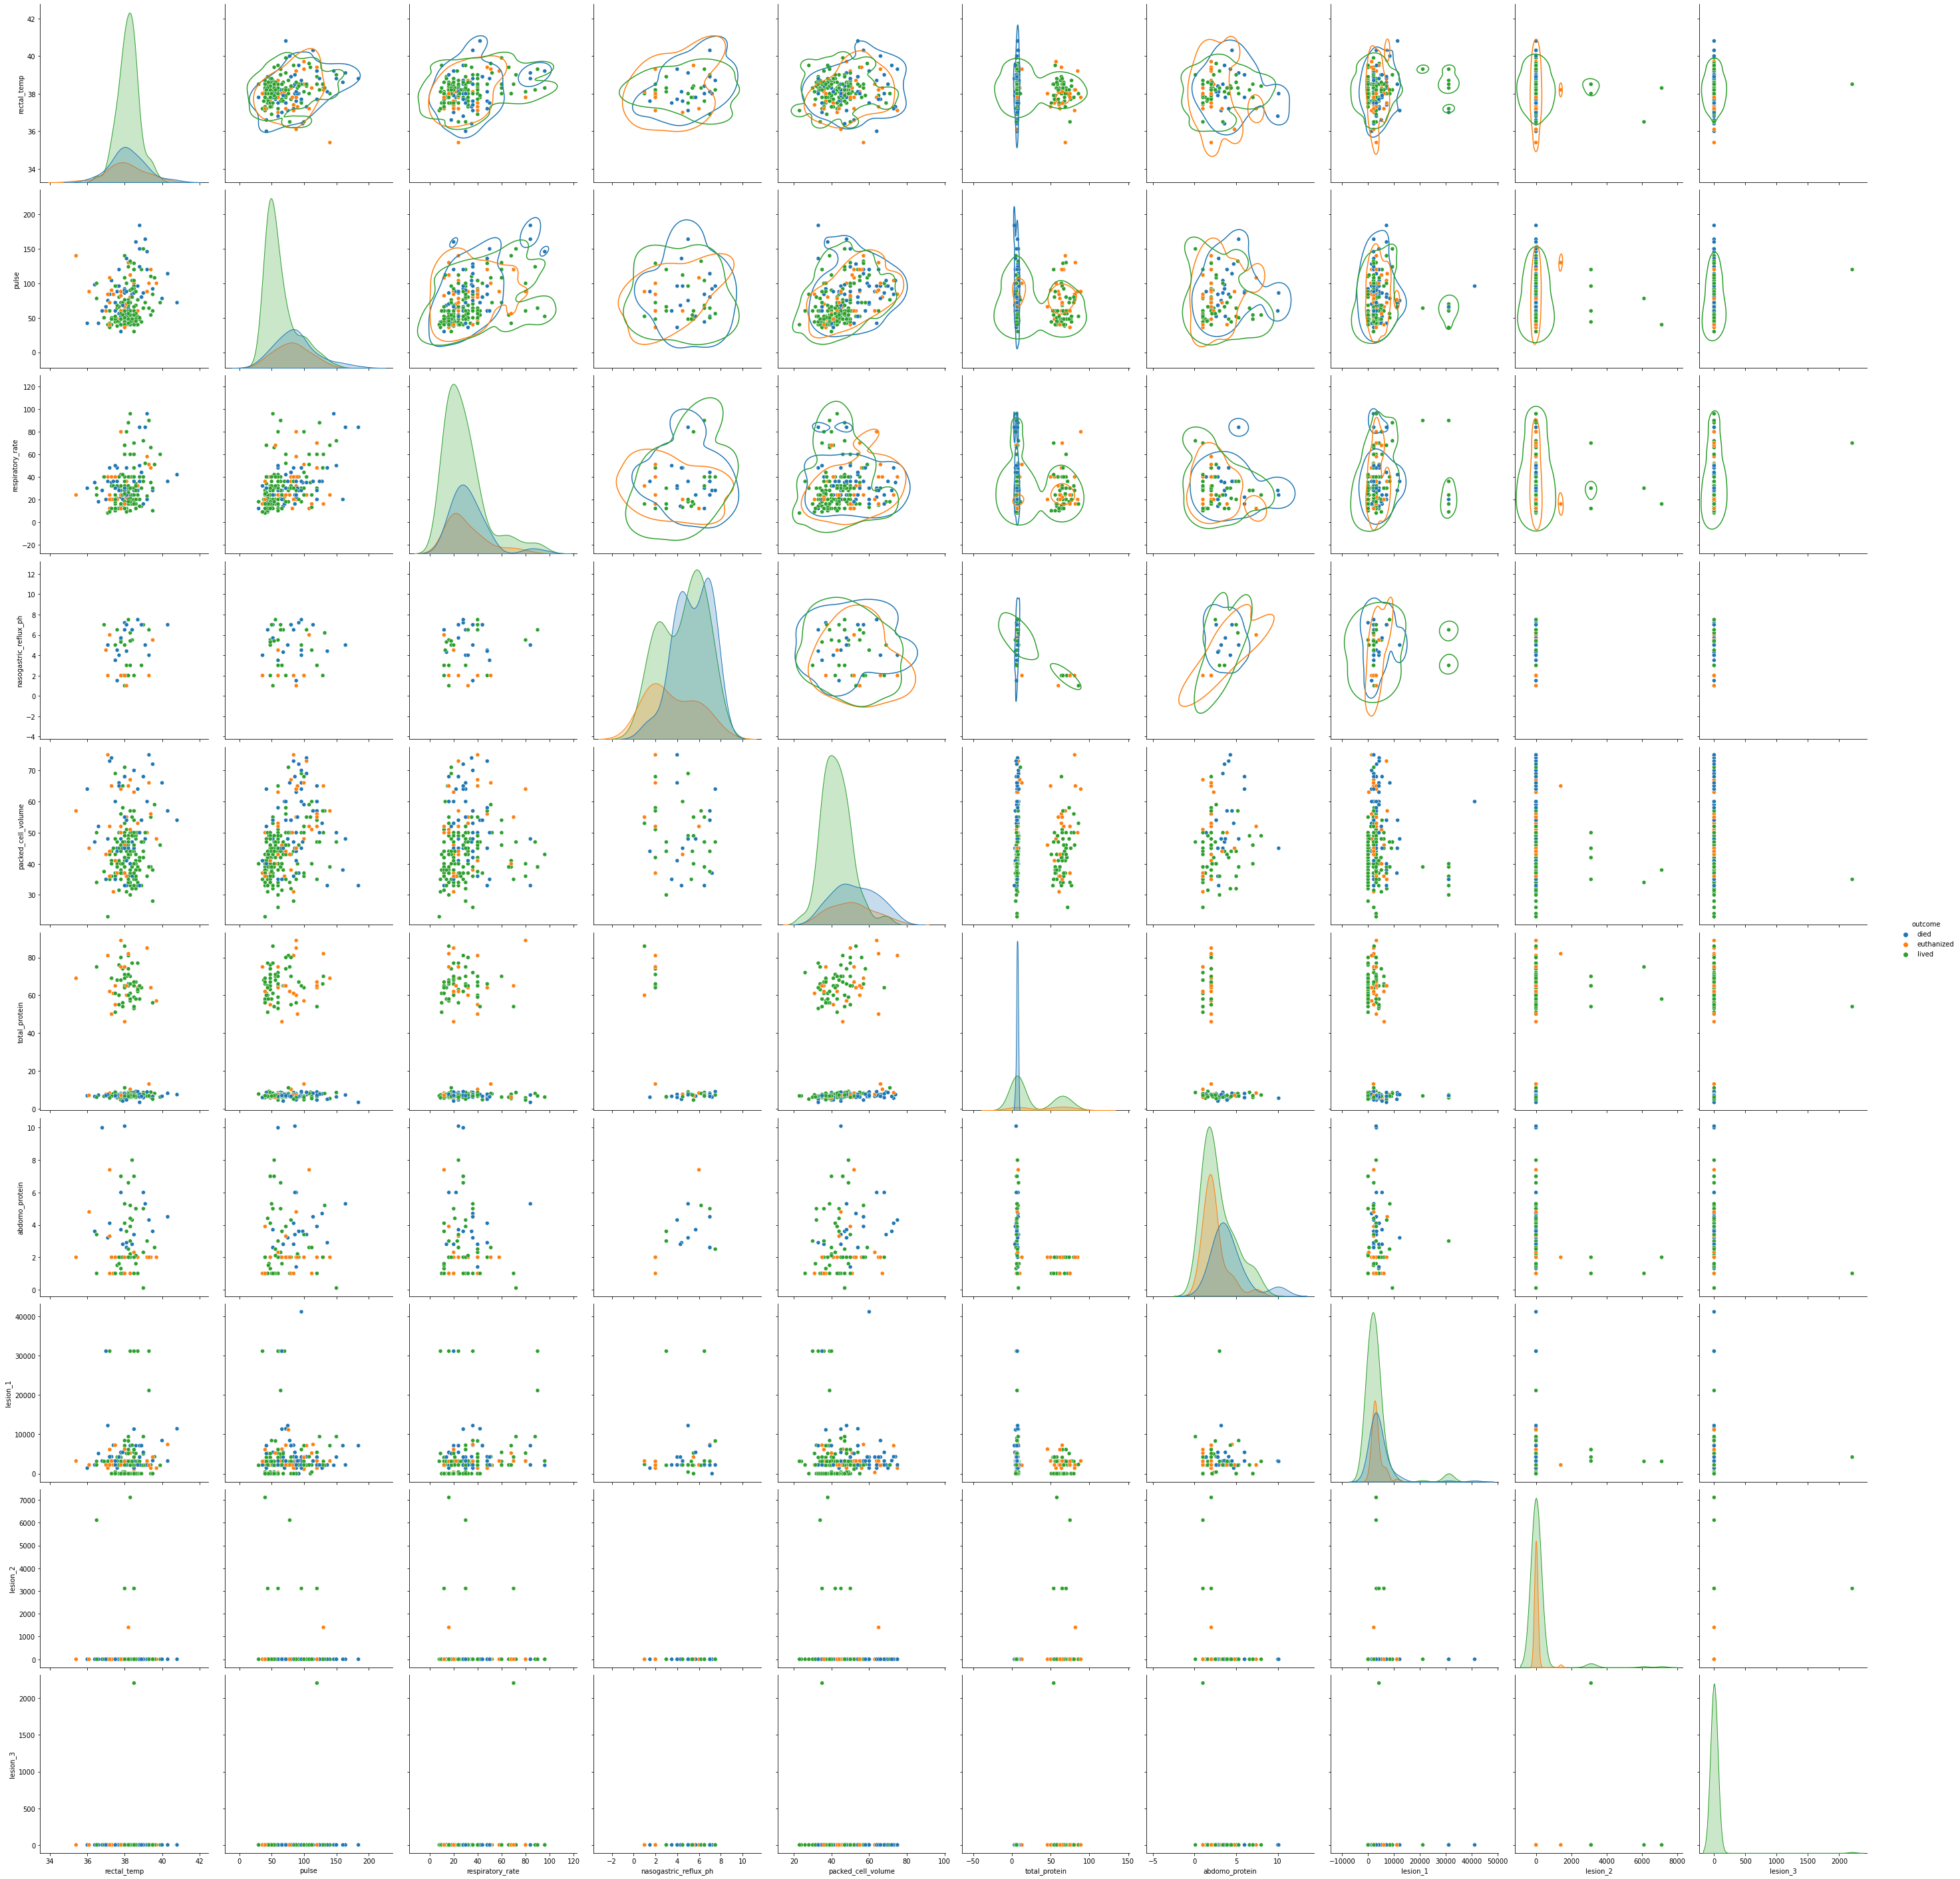

In [14]:
#Understanding the relationship between all the features

try:
    g=sns.pairplot(df1, hue=target, size=4)
    g.map_upper(sns.kdeplot, levels=1, color=".2")
    plt.show()
except:
    pass

# <center> 3. Data Preprocessing

In [15]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [16]:
#Check for empty elements

nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                       Total Null Values  Percentage
surgery                                0         0.0
lesion_2                               0         0.0
lesion_1                               0         0.0
surgical_lesion                        0         0.0
outcome                                0         0.0
lesion_3                               0         0.0
cp_data                                0         0.0
age                                    0         0.0
pulse                                 24         8.0
packed_cell_volume                    29         9.7
capillary_refill_time                 32        10.7
total_protein                         33        11.0
peristalsis                           44        14.7
mucous_membrane                       47        15.7
pain                                  55        18.4
abdominal_distention                  56        18.7
temp_of_extremities                   56        18.7
respiratory_rate                      58      

In [17]:
#Converting categorical Columns to Numeric

df1 = df.copy()
ecc = nvc[nvc['Percentage']!=0].index.values
dcc = [i for i in df.columns if i not in ecc]

#Target Variable
MAP={}
for i,e in enumerate(df1[target].unique()):
    MAP[e]=i
df1[target]=df1[target].map(MAP)
print('Mapping Target variable --->',MAP)

df3 = df1[dcc]
fcc = [i for i in cf if i not in ecc]

#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1m\nOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

Mapping Target variable ---> {'died': 0, 'euthanized': 1, 'lived': 2}

One-Hot Encoding on features:
surgery
surgical_lesion
lesion_3
cp_data
age

Dummy Encoding on features:
lesion_2


(299, 12)

In [18]:
# Fixing Empty Categorical Columns

for x in [i for i in ecc if i in cf]:
    a = df1[x]
    b=[]; c=[]

    for i,e in enumerate(a):
        if e!=e:
            b.append(i)
        else:
            c.append(i)

    RF = RandomForestClassifier()
    RF.fit(df3.loc[c],a[c])
    d = RF.predict(df3.loc[b])

    df3[x] = a
    f=0
    for i,e in enumerate(df3[x]):
        if e!=e:
            df3.loc[i,x] = d[f]
            f+=1
    df3 = pd.concat([df3.drop([x], axis=1), pd.DataFrame(pd.get_dummies(df3[x], drop_first=True, prefix=str(x)))],axis=1)   
df3

,surgery,age,outcome,surgical_lesion,lesion_1,lesion_3,cp_data,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_2_6112,lesion_2_7111,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious
0,0,0,0,0,11300,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,1,0,2208,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,1,1,0,1,2208,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,4300,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,1,0,3205,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
295,0,0,1,1,2208,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1
296,1,0,0,1,3205,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0
297,1,0,2,1,2208,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1


In [19]:
# Fixing Empty Numerical Columns

for x in [i for i in ecc if i not in cf]:
    a = df1[x]
    b=[]; c=[]

    for i,e in enumerate(a):
        if e!=e:
            b.append(i)
        else:
            c.append(i)

    LR = LinearRegression()
    LR.fit(df3.loc[c],a[c])
    d = LR.predict(df3.loc[b])

    df3[x] = a
    f=0
    for i,e in enumerate(df3[x]):
        if e!=e:
            df3.loc[i,x] = d[f]
            f+=1
    #df3 = pd.concat([df3.drop([x], axis=1), pd.DataFrame(pd.get_dummies(df3[x], drop_first=True, prefix=str(x)))],axis=1)   
df3

,surgery,age,outcome,surgical_lesion,lesion_1,lesion_3,cp_data,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_2_6112,lesion_2_7111,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,pain_depressed,pain_extreme_pain,pain_mild_pain,...,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,pulse,packed_cell_volume,total_protein,respiratory_rate,rectal_temp,abdomo_protein,nasogastric_reflux_ph
0,0,0,0,0,11300,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,66.0,45.0,8.400000,28.0,38.500000,2.690453,5.143129
1,1,0,1,0,2208,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,88.0,50.0,85.000000,20.0,39.200000,2.000000,-5.925473
2,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,40.0,33.0,6.700000,24.0,38.300000,3.986683,5.517949
3,1,1,0,1,2208,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,164.0,48.0,7.200000,84.0,39.100000,5.300000,5.000000
4,0,0,0,0,4300,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,104.0,74.0,7.400000,35.0,37.300000,3.924037,6.111531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,1,0,3205,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,120.0,55.0,65.000000,70.0,38.973277,3.702716,-1.907210
295,0,0,1,1,2208,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,72.0,44.0,-10.885029,24.0,37.200000,3.300000,8.713281
296,1,0,0,1,3205,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,72.0,60.0,6.800000,30.0,37.500000,5.665067,4.550523
297,1,0,2,1,2208,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,100.0,50.0,6.000000,24.0,36.500000,3.400000,0.656363


In [20]:
#Removal of outlier:

df4 = df3.copy()

for i in [i for i in df4.columns]:
    if df4[i].nunique()>=12:
        Q1 = df4[i].quantile(0.20)
        Q3 = df4[i].quantile(0.80)
        IQR = Q3 - Q1
        df4 = df4[df4[i] <= (Q3+(1.5*IQR))]
        df4 = df4[df4[i] >= (Q1-(1.5*IQR))]
df4 = df4.reset_index(drop=True)
display(df4.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df4.shape[0]))

,surgery,age,outcome,surgical_lesion,lesion_1,lesion_3,cp_data,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_2_6112,lesion_2_7111,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,pain_depressed,pain_extreme_pain,pain_mild_pain,...,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,pulse,packed_cell_volume,total_protein,respiratory_rate,rectal_temp,abdomo_protein,nasogastric_reflux_ph
0,1,0,1,0,2208,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,88.000000,50.000000,85.000000,20.000000,39.200000,2.000000,-5.925473
1,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,40.000000,33.000000,6.700000,24.000000,38.300000,3.986683,5.517949
2,0,0,0,0,4300,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,104.000000,74.000000,7.400000,35.000000,37.300000,3.924037,6.111531
3,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,48.173192,37.739388,31.756186,32.420734,37.862774,-1.976846,6.189970
4,1,0,2,1,3124,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,48.000000,37.000000,7.000000,16.000000,37.900000,4.796877,8.675316



Inference: Before removal of outliers, The dataset had 299 samples.
Inference: After removal of outliers, The dataset now has 269 samples.


In [21]:
#Fixing the imbalance using SMOTE Technique

df5 = df4.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
2    166
0     64
1     39
Name: outcome, dtype: int64

Class distribution after applying SMOTE Technique:
2    166
1    166
0    166
Name: outcome, dtype: int64


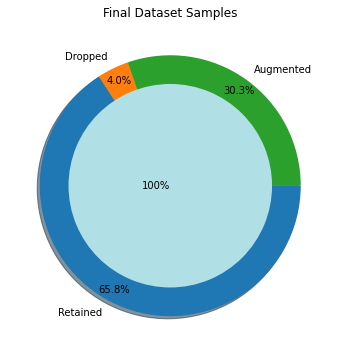


Inference:The final dataset after cleanup has 498 samples & 55 columns.


In [22]:
#Final Dataset size after performing Preprocessing

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

---

# <center> 4. Data Manipulation

In [23]:
#Splitting the data intro training & testing sets

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (498, 54) (498,) 
Training set  --->  (398, 54) (398,) 
Testing set   --->  (100, 54)  (100,)


In [24]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,surgery,age,surgical_lesion,lesion_1,lesion_3,cp_data,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_2_6112,lesion_2_7111,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,...,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,pulse,packed_cell_volume,total_protein,respiratory_rate,rectal_temp,abdomo_protein,nasogastric_reflux_ph
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,398.0,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-1.941496e-16,2.232999e-16,-2.700241e-16,-2.789505e-17,0.0,9.372737e-17,-1.684512e-16,1.450543e-17,-1.729842e-16,-1.483668e-16,-2.901085e-17,7.085343e-17,1.146487e-16,8.647466e-18,-3.235826e-17,9.721425e-17,-4.279101e-16,9.024049e-17,-1.350120e-16,1.696019e-16,-1.318041e-16,-3.952729e-16,1.709967e-16,-1.026538e-16,1.676493e-16,...,-4.811896e-17,2.454764e-17,-1.011196e-16,1.785283e-17,-3.375301e-17,1.785283e-17,9.079839e-17,-2.016812e-16,-7.810614e-17,-1.174382e-16,1.220408e-16,-1.274804e-16,3.369722e-16,4.485524e-16,-1.531438e-16,6.915183e-16,2.108866e-16,-6.360072e-17,3.291616e-16,-1.506333e-16,1.199487e-16,2.426869e-16,-4.554146e-15,-6.471652e-17,-2.008444e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,0.0,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.158092e+00,-1.979002e-01,-1.285820e+00,-1.610141e+00,0.0,-5.172194e-01,-5.018856e-02,-7.106691e-02,-5.018856e-02,-5.018856e-02,-5.018856e-02,-9.654216e-01,-5.792844e-01,-3.201454e-01,-7.694154e-01,-1.763181e-01,-3.056249e-01,-2.360147e-01,-4.579590e-01,-4.171826e-01,-4.254514e-01,-4.579590e-01,-4.458645e-01,-4.130233e-01,-3.295984e-01,...,-4.779070e-01,-2.300219e-01,-1.007585e-01,-6.257862e-01,-9.414117e-01,-4.046513e-01,-1.763181e-01,-3.962029e-01,-2.750921e-01,-7.860574e-01,-3.388893e-01,-1.164057e+00,-4.897708e-01,-1.979002e-01,-3.248931e-01,-2.533202e-01,-5.289071e-01,-7.084397e-01,-1.784777e+00,-2.603782e+00,-1.792346e+00,-1.862668e+00,-2.884468e+00,-2.902647e+00,-2.756799e+00
25%,-1.158092e+00,-1.979002e-01,-1.285820e+00,-3.898746e-01,0.0,-5.172194e-01,-5.018856e-02,-7.106691e-02,-5.018856e-02,-5.018856e-02,-5.018856e-02,-9.654216e-01,-5.792844e-01,-3.201454e-01,-7.694154e-01,-1.763181e-01,-3.056249e-01,-2.360147e-01,-4.579590e-01,-4.171826e-01,-4.254514e-01,-4.579590e-01,-4.458645e-


                                Standardardization on Testing set                                


,surgery,age,surgical_lesion,lesion_1,lesion_3,cp_data,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_2_6112,lesion_2_7111,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,...,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,pulse,packed_cell_volume,total_protein,respiratory_rate,rectal_temp,abdomo_protein,nasogastric_reflux_ph
count,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.034641,0.012138,0.055477,-0.001677,0.01,-0.002586,-5.018856e-02,0.070356,-5.018856e-02,-5.018856e-02,-5.018856e-02,-0.044852,0.158492,-0.079085,0.016844,-0.000882,-0.019416,-0.012363,0.070353,-0.079477,-0.036826,-0.008894,-0.042560,0.153816,0.006761,...,-0.040945,0.090399,-1.007585e-01,0.019109,0.120521,-0.002023,-0.117839,0.071023,-0.079580,-0.086259,-0.009919,-0.152497,0.143115,-0.092881,0.049418,-0.085284,-0.069183,0.033558,0.013099,0.200137,-0.061276,0.113087,-0.007546,0.068842,-0.087212
std,0.999290,1.034156,0.989201,0.969892,0.10,1.003192,1.394770e-17,1.414231,4.184310e-17,1.394770e-17,6.973851e-18,1.002437,1.080903,0.883083,1.009374,1.002600,0.975471,0.979788,1.061947,0.919119,0.968052,0.997256,0.964894,1.139389,1.014162,...,0.970377,1.173803,1.115816e-16,1.014149,1.005056,1.002932,0.584788,1.075942,0.856510,0.979913,0.991884,1.016657,1.101712,0.738837,1.070074,0.827351,0.953993,1.016266,1.010280,1.141567,0.957654,0.996004,0.906060,0.956787,0.994077
min,-1.158092,-0.197900,-1.285820,-1.610141,0.00,-0.517219,-5.018856e-02,-0.071067,-5.018856e-02,-5.018856e-02,-5.018856e-02,-0.965422,-0.579284,-0.320145,-0.769415,-0.176318,-0.305625,-0.236015,-0.457959,-0.417183,-0.425451,-0.457959,-0.445865,-0.413023,-0.329598,...,-0.477907,-0.230022,-1.007585e-01,-0.625786,-0.941412,-0.404651,-0.176318,-0.396203,-0.275092,-0.786057,-0.338889,-1.164057,-0.489771,-0.197900,-0.324893,-0.253320,-0.528907,-0.708440,-1.552880,-1.760411,-1.394075,-1.399246,-1.621148,-2.181869,-2.393856
25%,-1.158092,-0.197900,-1.285820,-0.388628,0.00,-0.517219,-5.018856e-02,-0.071067,-5.018856e-02,-5.018856e-02,-5.018856e-02,-0.965422,-0.579284,-0.320145,-0.769415,-0.176318,-0.305625,-0.236015,-0.457959,-0.417183,-0.425451,-0.457959,-0.445865,-0.413023,-0.329598,...,-0.477907,-0.230022,-1.007585e-01,-0.625786,-0.941412,-0.404651,-0.176318,-0.396203,-0.275092,-0.786057,-0.338889,-1.164057,-0.489771,-0.197900,-0.324893,-0.253320,-0.528907,-0.708440,-0.897363,-0.788401,-0.712180,-0.689861,-0.742736,-0.603037,-0.728294
50%,0.863489,-0.197900,0.777714,0.113272,0.00,-0.517219,-5.018856e-02,-0.071067,-5.018856e-02,-5.018856e-02,-5.018856e-02,-0.965422,-0.579284,-0.320145,-0.769415,-0.176318,-0.305625,-0.236015,-0.457959,-0.417183,-0.425451,-0.457959,-0.445865,-0.413023,-0.329598,...,-0.477907,-0.230022,-1.007585e-01,-0.625786,1.062235,-0.404651,-0.176318,-0.396203,-0.275092,-0.786057,-0.338889,-0.152497,-0.489771,

---

# <center> 5. Feature Selection/Extraction

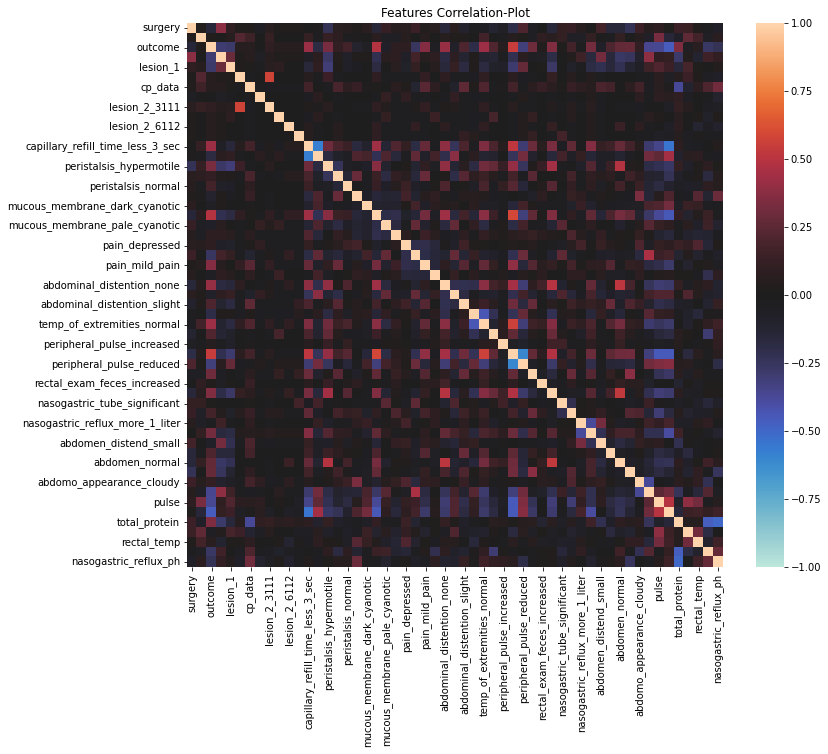

In [25]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

## 5a. Manual Method - VIF

100%|██████████| 53/53 [00:40<00:00,  1.29it/s]


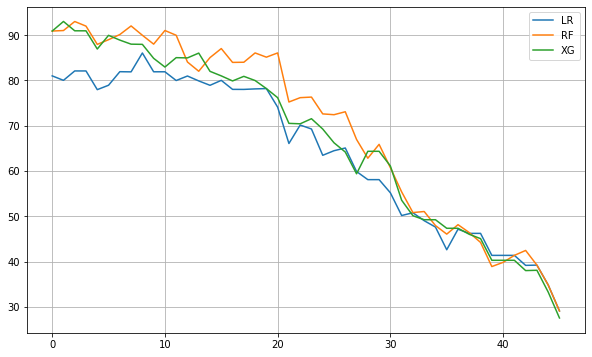

In [26]:
# Calculate the VIFs to remove multicollinearity

DROP=[]; scores1=[]; scores2=[]; scores3=[]
#scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y, eval_metric='logloss').predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        
for i in tqdm(range(len(X.columns.values)-1)):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>1:
        scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y, eval_metric='logloss').predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
    #print(scores)
    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.7,0.85])
plt.legend()
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

100%|██████████| 54/54 [00:54<00:00,  1.02s/it]


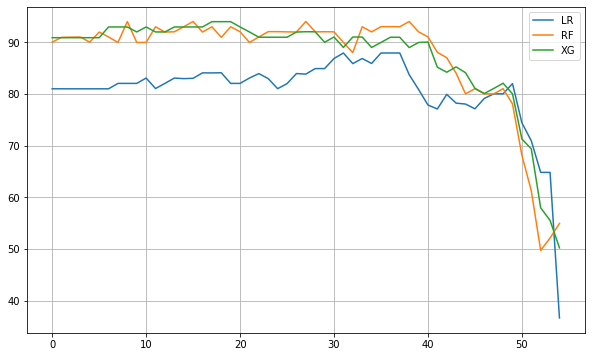

In [27]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores1=[]; scores2=[]; scores3=[]
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

for i in tqdm(range(len(X.columns.values))):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

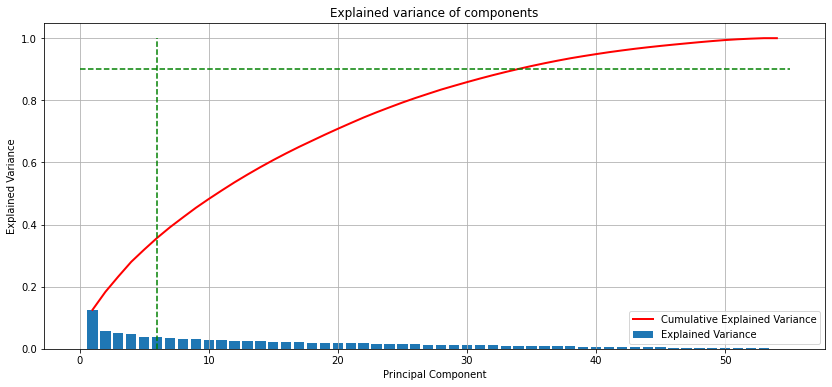

In [28]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([6,6],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

100%|██████████| 54/54 [00:33<00:00,  1.64it/s]


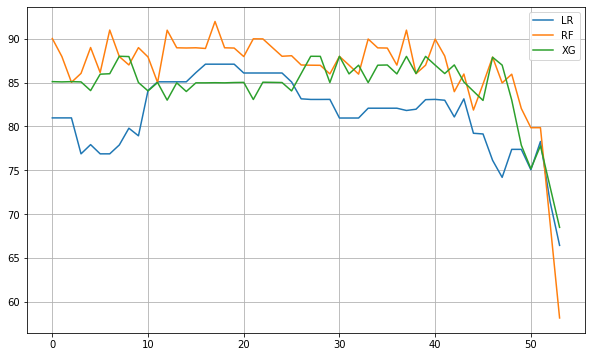

In [29]:
#Applying PCA Transformations

# scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

scores1=[]; scores2=[]; scores3=[]
for i in tqdm(range(len(X.columns.values))):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    #print('The shape of final transformed training feature set:')
    #print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    #print('\nThe shape of final transformed testing feature set:')
    #print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)
    
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std_pca, Train_Y, eval_metric='logloss').predict(Test_X_std_pca),average='weighted')*100)

    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

In [30]:
#### Finalising the shortlisted features

rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-10)   
rfe = rfe.fit(Train_X_std, Train_Y)

print(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    
Train_X_std = Train_X_std[Train_X_std.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X_std.columns[rfe.support_]]

print(Train_X_std.shape)
print(Test_X_std.shape)

81.02818942641355
92.91797674609023
91.97077690662866
(398, 44)
(100, 44)


---

# <center> 6. Predictive Modeling

In [31]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [32]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob, multi_class='ovr'),3)*100 #[:, 1]
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*25,Evaluation_Results.index[i], '-'*25,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<------------------------- Evaluating Logistic Regression (LR) ------------------------->>>

Accuracy = 81.0%
F1 Score = 81.0%

 Confusiton Matrix:
 [[30  4  1]
 [ 2 23  4]
 [ 4  4 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.74      0.79      0.77        29
           2       0.85      0.78      0.81        36

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



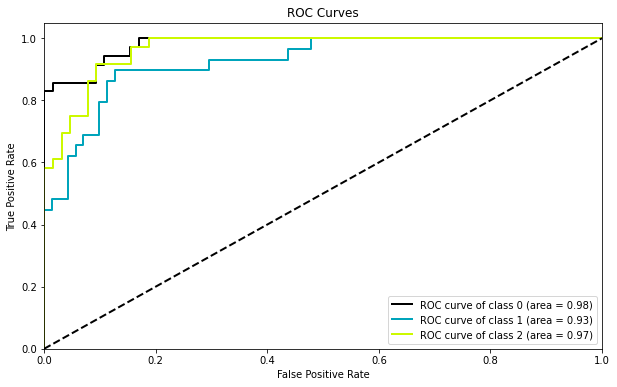


Interpreting the Output of Logistic Regression:

intercept  -0.6408120691430671
classes [0 1 2]


,coeff
surgery,0.781774
age,0.202786
surgical_lesion,-0.447980
lesion_1,0.468706
cp_data,-0.325776
lesion_2_3111,-0.006973
lesion_2_3112,-0.010991
capillary_refill_time_less_3_sec,0.218709
capillary_refill_time_more_3_sec,-0.410750
peristalsis_hypermotile,-0.756455


In [33]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = LR_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

## 2. Decisoin Tree Classfier:

<<<------------------------- Evaluating Decision Tree Classifier (DT) ------------------------->>>

Accuracy = 80.0%
F1 Score = 80.0%

 Confusiton Matrix:
 [[29  3  3]
 [ 2 24  3]
 [ 3  6 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.73      0.83      0.77        29
           2       0.82      0.75      0.78        36

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



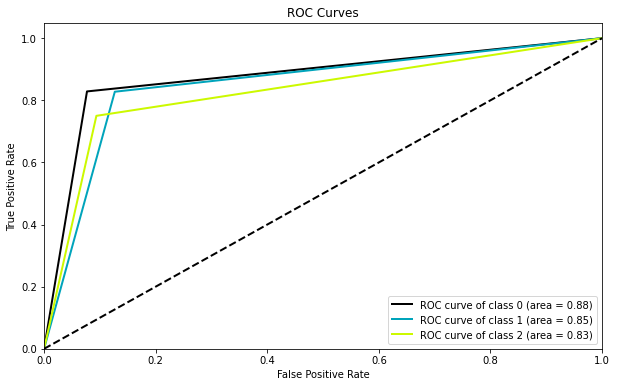


Interpreting the output of Decision Tree:



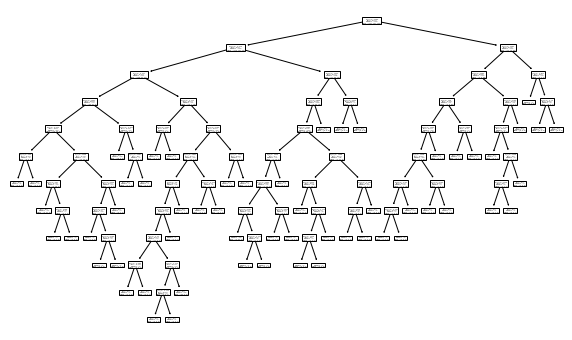

In [34]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, len(features)-1),
              "min_samples_leaf": randint(1, len(features)-1),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = DT_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

---

## 3. Random Forest Classfier:

<<<------------------------- Evaluating Random Forest Classifier (RF) ------------------------->>>

Accuracy = 91.0%
F1 Score = 91.0%

 Confusiton Matrix:
 [[33  0  2]
 [ 1 27  1]
 [ 2  3 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.90      0.93      0.92        29
           2       0.91      0.86      0.89        36

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



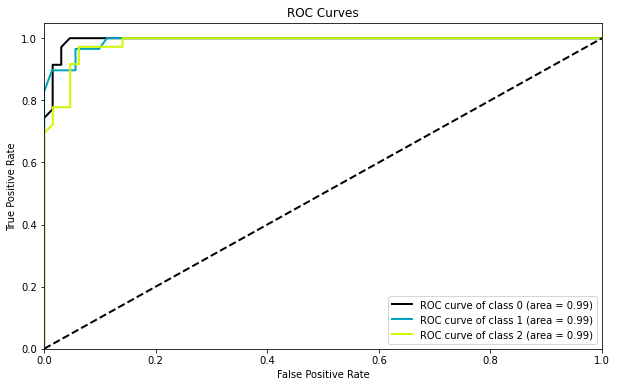


Interpreting the output of Random Forest:



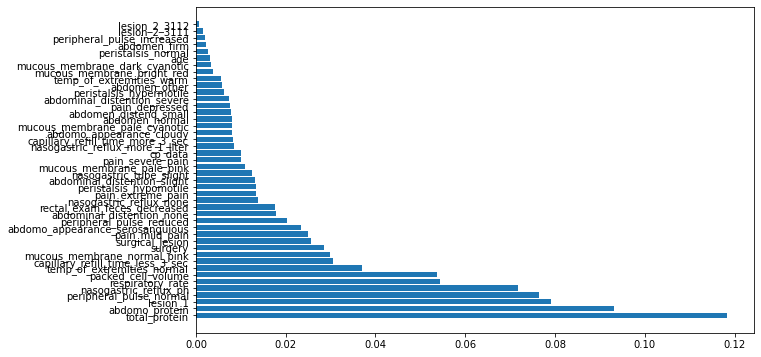

In [35]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RF_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 4. Naive Bayes Classfier:

<<<------------------------- Evaluating Naïve Bayes Classifier (NB) ------------------------->>>

Accuracy = 77.0%
F1 Score = 77.2%

 Confusiton Matrix:
 [[28  5  2]
 [ 8 20  1]
 [ 4  3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.71      0.69      0.70        29
           2       0.91      0.81      0.85        36

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100



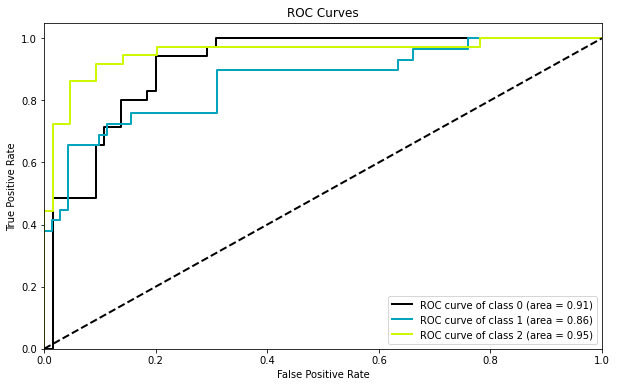

In [36]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = NB_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<------------------------- Evaluating Support Vector Machine (SVM) ------------------------->>>

Accuracy = 86.0%
F1 Score = 86.0%

 Confusiton Matrix:
 [[31  3  1]
 [ 2 24  3]
 [ 4  1 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        35
           1       0.86      0.83      0.84        29
           2       0.89      0.86      0.87        36

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



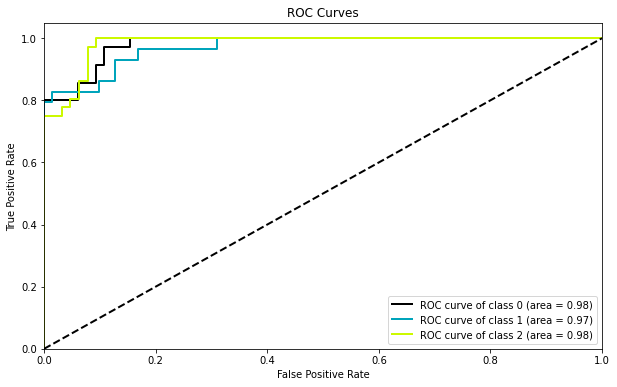

In [37]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = SVM_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<------------------------- Evaluating K Nearest Neighbours (KNN) ------------------------->>>

Accuracy = 77.0%
F1 Score = 77.3%

 Confusiton Matrix:
 [[29  5  1]
 [ 6 23  0]
 [ 8  3 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        35
           1       0.74      0.79      0.77        29
           2       0.96      0.69      0.81        36

    accuracy                           0.77       100
   macro avg       0.79      0.77      0.77       100
weighted avg       0.80      0.77      0.77       100



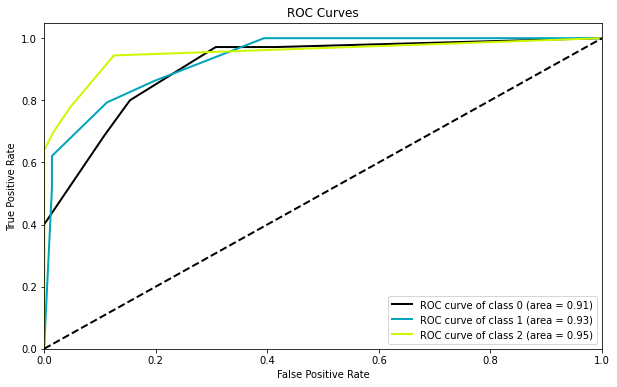

In [38]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = KNN_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 7. Gradient Boosting Classfier:

<<<------------------------- Evaluating Gradient Boosting (GB) ------------------------->>>

Accuracy = 92.0%
F1 Score = 91.9%

 Confusiton Matrix:
 [[34  0  1]
 [ 0 28  1]
 [ 3  3 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.90      0.97      0.93        29
           2       0.94      0.83      0.88        36

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



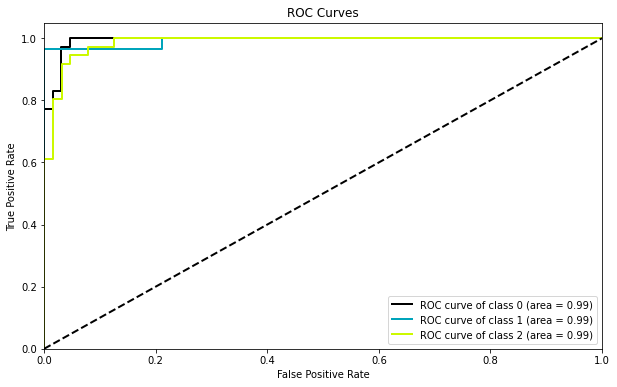

In [39]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = GB_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

---

## 8. Extreme Gradient Boosting Classfier:

<<<------------------------- Evaluating Extreme Gradient Boosting (XGB) ------------------------->>>

Accuracy = 92.0%
F1 Score = 92.0%

 Confusiton Matrix:
 [[33  1  1]
 [ 0 28  1]
 [ 2  3 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        35
           1       0.88      0.97      0.92        29
           2       0.94      0.86      0.90        36

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



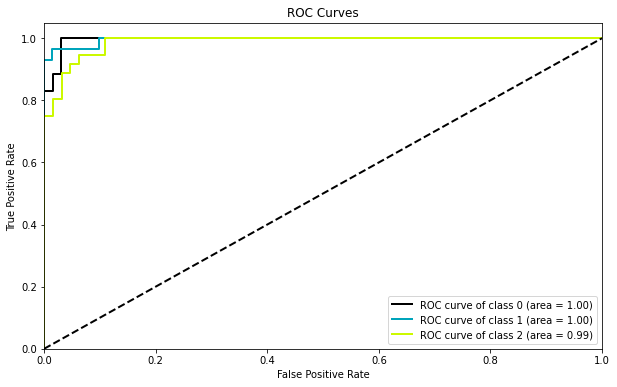

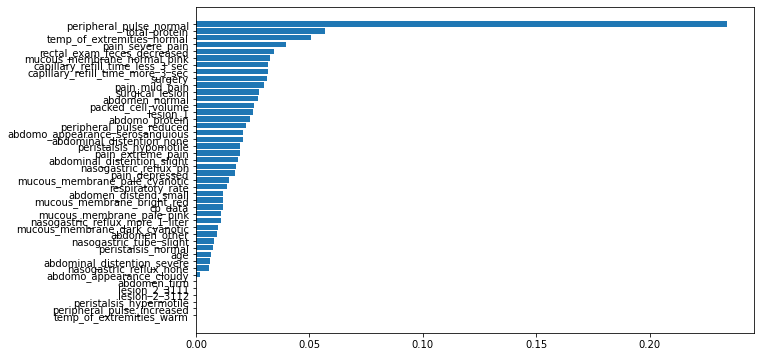

In [40]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier()#.fit(Train_X_std, Train_Y, eval_metric='logloss')

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = XGB_model.fit(Train_X_std, Train_Y, eval_metric='logloss')#.best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,7)

xgbf=pd.DataFrame(XGB.feature_importances_, index=Train_X_std.columns).sort_values(by=0)
plt.barh(xgbf.index,xgbf.values[:,0])
plt.show()

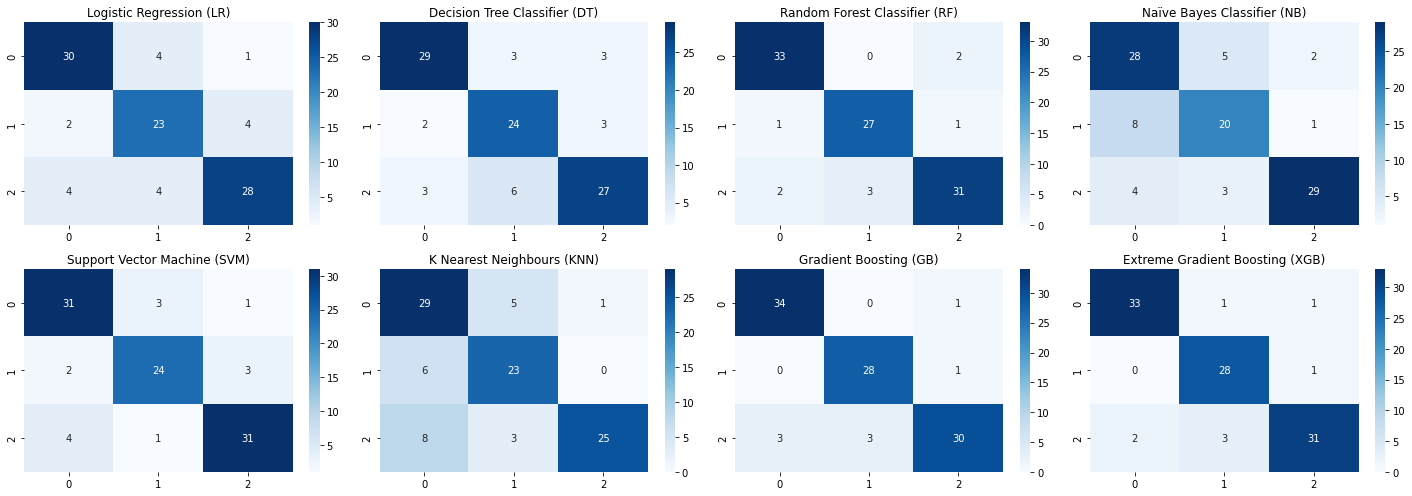

In [41]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='Blues', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

                                    ML Algorithms Comparison                                    


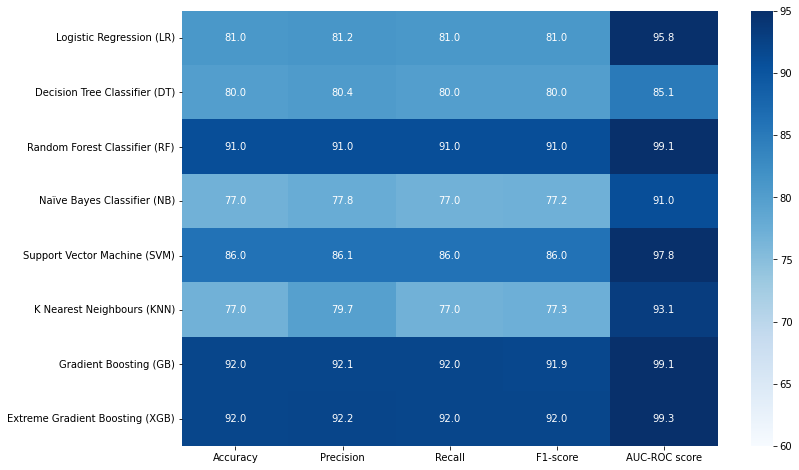

In [42]:
#Comparing all the models Scores

print('\033[1mML Algorithms Comparison'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=60, vmax=95, cmap='Blues', fmt='.1f')
plt.show()

# <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet small totalling around 300 samples & after preprocessing 3.9% of the datasamples were dropped. 
- The samples were slightly imbalanced after processing, hence SMOTE Technique was applied on the data to  balance the classes, adding 30.4% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The XG-Boosting & Random Forest Classifier performed exceptionally well on the current dataset, considering F1-Score as the key-metric.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive, but comes at the cost of slight misclassifications.